# Practical 4 (Week 9): Hypothesis Testing with Samples

By the end of this practical you should be able to:
•	Plot histograms by a categorical variable
•	Conduct independent sample t test
•	Conduct paired sample t test
•	Carry out Mann Whitney U test

The objective of this practical is develop familiarity with the process of hypothesis testing.


As Always the first part of the process is always loading our libraries.

In [4]:
library(tidyverse)

ERROR: Error in library(car): there is no package called ‘car’



## Part 1: Setting up for t-testing

This will be your first application of the t-test to investigate the difference of means.

The question to be investigated is: is there income inequality across urban and rural areas? Income inequality is a very important academic and policy topic. You can carry out research on income inequality in relation to gender, social background, ethnicity, and region.

Here is the meta-data for the data set: 

Observation:   935

  1. wage: monthly earnings
  2. hours: average weekly hours
  3. IQ: IQ score
  4. educ: years of education
  5. exper: years of work experience
  6. age: age in years
  7. married: =1 if married
  8. black: =1 if black
  9. south: =1 if live in south
  10. urban: =1 if live in SMSA (standard Metropolitan Statistical Area, USA)
 

First let's load the `Wage.csv` file in your working folder. Call this data object "wages".


In [2]:
wages <- read_csv("Wage.csv")

Parsed with column specification:
cols(
  wage = col_double(),
  hours = col_double(),
  IQ = col_double(),
  educ = col_double(),
  exper = col_double(),
  age = col_double(),
  married = col_character(),
  black = col_character(),
  south = col_character(),
  urban = col_character()
)



Based on the output there are some things we need to tidy up including converting some of the columns into different data types. 

You are going to use this data to query whether people in urban and rural areas are paid differently. In other words, you want to answer the question: does place matter in terms of earnings? Remember this is a data set including information for a sample of 935 individuals, which is a fairly small data set nowadays. And we want to make inference for the whole population. This is not different from the common practice that pollsters interview 1000 people about their voting tendency and make inference about election results.

### Formulating hypotheses

The first step in any statistical test is always to state our hypotheses. Remember, we are looking for enough evidence to reject the null hypothesis. So first, we need to define these hypotheses in a way that means they can be tested. We state the hypotheses as follows:

**The Null Hypothesis: urban residents and rural residents earn the same amount of money.**

**The alternative hypothesis: urban residents and rural residents earn different amount of money.**

As always, there are assumptions: wages of each population (that of all individuals in a region) are normally distributed. We won’t test the normality assumption in this practical due to time constraints (though you can if you wish based on what you learned last week).

A second assumption is that both sampels (and therefore the populations from which they come) have the same variance. You need to run a Levene’s test to assess whether this assumption holds and then use this information when running the t-test. 

Let's do this below. 

### Draw histogram

The next important step is, as always, looking at some graphical representations of your data. Because we are looking at a continuous variable (wages) across a categorical variable (urban) we can use a histogram. But, this time we want to produce two historams; one for urban areas and one for rural areas.

`ggplot()` has an easy way to do this using the `facet_grid()` command. Use the code below to produce a histogram:

`ggplot(wages, aes(x=wage)) + geom_histogram() + facet_grid(urban ~ .)`


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



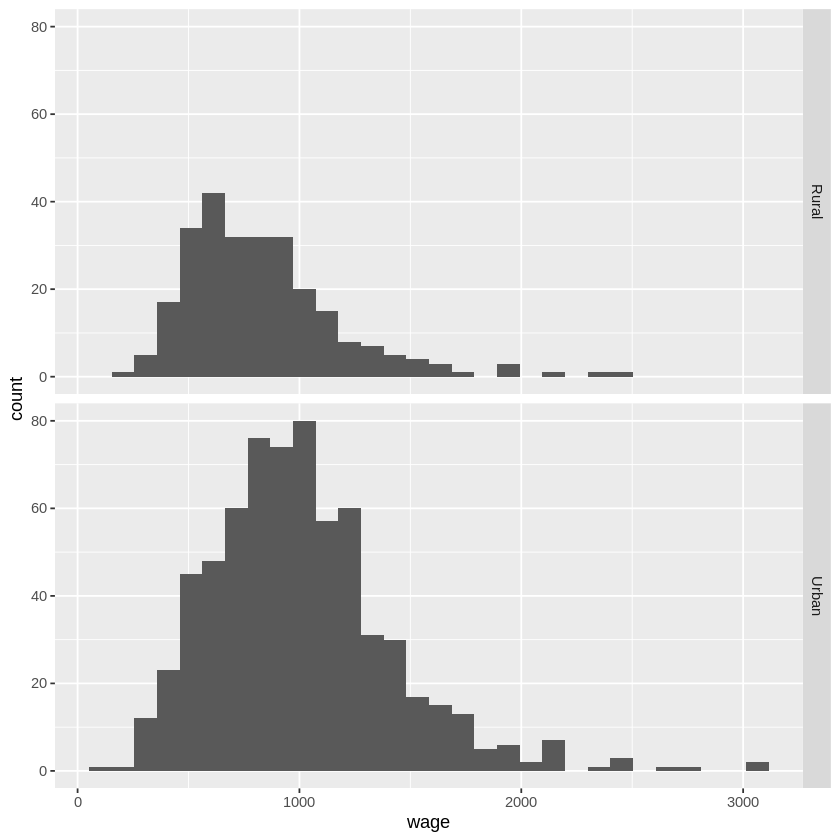

In [5]:
ggplot(wages, aes(x=wage)) + geom_histogram() + facet_grid(urban ~ .)

Two histograms should have appeared. The top one is for people in rural areas and the bottom one is people in urban areas. The graph shows that the range of wages for urban is greater than for other areas. 

Use the graphs to have a guess at where the mean value lies for each.

Now produce some descriptive statistics to what the true means are. 

HINT: Probably the easiest way to do this is to produce subsets of the data (i.e. new data objects, one with just data on urban areas and the other for rural areas.

`urban <- filter(wages, urban == "Urban")`

`rural <- filter(wages, urban == "Rural")`

`mean(urban$wage)`

`mean(rural$wage)`

[1] 1008.241

[1] 830.1098

The the numbers above show clearly that the sample means wage values are different between urban and rural areas. But, the histogram shows a relatively large amount of **OVERLAP** in terms of wage distribution between the two types of area. Remember, because we have used a sample here, we need a formal statistical method to determine whether or not the differences in wages between urban and rural areas is statistically significant.

## Part 2: Independent samples t-test

The method we use to answer this question is an independent samples t-test. This is because sample members are independent of each other and are drawn from different areas. Statistically speaking, the question this test will assess is whether the two samples are drawn from populations with the same mean. In essence, we are testing the effect of a categorical variable (urban) on a continuous variable (wage).

Before we run the independent samples t-test, we first need to determine if the variance of the wage variable is equal between the two groups of urban and rural. This is an important assumption and affects how we conduct the t-test. To test whether this assumption is true with our data we conduct a Levene’s test for equality of variances. The Levene’s test assesses the null hypothesis of equal variances between urban and rural areas. Just like with any other test we calculate a p-value to determine whether we can reject or accept this hypothesis. Let’s do this now.

Unfortunately, the true levenes test is not available in noteable, so instead we will use a command called `var.test()` which tests, as the name suggests, whether variances are equal. Use the code below to do this. In the brackets we specify the variables with the numeric variable specified first i.e. wage followed by the categorical variable (i.e. urban). Both variabels are separated by the ~ sign. We then specify the data we wish to select the variables from after the comma.

`var.test(wage ~ urban, wages)`


In [24]:
var.test(wage ~ urban, wages)


	F test to compare two variances

data:  wage by urban
F = 0.72388, num df = 263, denom df = 670, p-value = 0.002318
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5941313 0.8899611
sample estimates:
ratio of variances 
         0.7238831 


Look at the result. Based on the 95% significance, should we accept or reject the null hypothesis? Does this mean that the variances are equal or unequal? HINT: Much like testing if data are normally distributed, this test can be a little confusing because accepting the null hypothesis means that we accept that the variances are equal which is normally a good thing… So based on the above we would say that the data **do not** have the same variances.

Now that we have completed the Levene’s test and we know that the variances are unequal we can now go on to complete the t-test.

The command to do this is pretty straightforward. We use the `t.test()` command. In the brackets we specify the information in almost the same way we did earlier when testing the variances. We specify the numeric variable first (i.e. `wage`) followed by the categorical variable (i.e. urban) separated by the `~` sign. We then specify the data we wish to use and then we also have to specify whetehr the variance is equal or not (based on our earlier test). Since our variances are not equal, we use `var.equal=FALSE`.

`t.test(wage ~ urban, wages, var.equal=FALSE) `

In [26]:
t.test(wage ~ urban, wages, var.equal=FALSE)


	Welch Two Sample t-test

data:  wage by urban
t = -6.631, df = 561.47, p-value = 7.847e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -230.8970 -125.3662
sample estimates:
mean in group Rural mean in group Urban 
           830.1098           1008.2414 


R generates a block of output for the independent samples t-test with various bits of information. It provides the t-statistic, the degrees of freedom and the p-value. Should we accept or reject the null hypothesis here? Do urban and rural residents on average have the same earnings?

## Exercise 1

Now complete hypothesis testing for mean wages of residents comparing the North with the South. To do this repeat the steps above but this time using south as the grouping variable. Are the variances equal? What is your NULL hypothesis for the t-test? What conclusion can you draw from the t-test result?

To test whether the variances are equal:

`var.test(wage ~ south, wages)`

To conduct the t-test:

`t.test(wage ~ urban, wages, var.equal=TRUE)`

Note above that we specify `var.equal=FALSE` on the basis of the first test.

From this we can conclude there is a significant difference because of the very small p-value.

So far we have only conducted two-tailed t-tests. In the two-tailed test, you made no specific prediction about the direction of the effect. So at the beginning you are not sure whether people in urban areas earn more or less than people in rural areas. Or your focus is about whether there is any difference between wages of urban residents and that of rural residents, rather than whether earnings of urban residents are higher or lower than their rural counterparts. However, often we are in a position to make specific predictions about which group has the higher mean. For example, your prediction may be that on average people in urban areas earn more than people in rural areas, then you make a hypothesis with a directional effect. In this case, you can use a one-tailed t test. 

The null hypothesis is thus changed to: 

**residents in urban areas are paid equal or lower wages compare with their counterparts in rural areas**

The alternative hypothesis becomes:

**residents in urban areas are paid higher wages than their counterparts in rural areas**

R can do this but it is actually easy to calculate ourselves from the results of the two-tailed test. The p value of a one-tailed t test is just half of the p value of the two-tailed t test. So if you obtained a p value of 0.084 from a two-tailed t test, the p value for the one-tailed t test is 0.084/2=0.042.

Go back to your two-tailed t-test output from the test between urban and rural areas and calculate the p-value for the one-tailed test. HINT: you will need to figure out the number of decimal places!

Now re-run the `t.test()` command but this time like this instead:

`t.test(wage ~ urban, wages, var.equal=FALSE, alternative = "less")`

You'll notice that now we specify the alternative hypothesis with `alternative = "less"`. Why "less"? We would most likely expect that urban wages would be higher than rural wages so the difference would be less than 0 (i.e. when we subtract urban wages from rural wages we would expect a minus number) hence why we specify "less". Run this test and verify that the p-value from this test is indeed half of the value from the two-tailed test. 

In [31]:
t.test(wage ~ urban, wages, var.equal=FALSE, alternative = "less")


	Welch Two Sample t-test

data:  wage by urban
t = -6.631, df = 561.47, p-value = 3.924e-11
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -133.8719
sample estimates:
mean in group Rural mean in group Urban 
           830.1098           1008.2414 


You should be able to see that the p-value is indeed half what we originally saw in the first t-test!

## PART 3: Paired Samples T-test

A paired-samples T-test applies when there is a one-to-one correspondence between the members of the two samples. For example, each member of the sample is measured twice before and after a treatment. In this case the independent sample t test is not appropriate and you need to conduct a paired-sample test.

We are going to work with a different dataset to illustrate this. We are going to use the "hosp_admissions.csv" file in the week 9 folder.

Go ahead and load this data and take a look at it. When you load the data, make sure you name the object `hosp`.

`hosp <- read_csv("hosp_admissions.csv")`

In [43]:
hosp <- read_csv("hosp_admissions.csv")

Parsed with column specification:
cols(
  year = col_double(),
  hosp_admissions = col_double()
)



This datafile consists of a sample of 50 datazones from across Scotland (remember datazones are small geographical areas). There are two columns. Column one records, for each sampled datazone, the annual rate of hospitalisations (per 10000 people) for respiratory health conditions (variable is called "hosp_admissions"). The second column records the year that data come from, either 2017 or 2019 (variable is called `year`). Between these two years the Scottish Government implemented various measures that significantly reduced air pollution andimproved air quality. We are going to test if this improved air quality was associated with reductions in respiratory hospital admissions. 

Hopefully, you can see immediately that this is paired data because we measure the same areas twice. We will thus test the following hypotheses:

**Null hypothesis: there is no difference in hospitalisations before and after improvements in air quality. In other words the difference in mean hospitalisations is zero**

**Alternative hypothesis: there is a difference in hospitalisations before and after improvements in air quality. In other words the difference in mean hospitalisations is more or less than zero**

## Exercise 

With this new data produce a histogram in the same way you did earlier (i.e. with two plots, one for each year).

Next, calculate the mean hospitalisation for each year, the same way as you did earlier (i.e. by producing subsets)

Now we will conduct our paired samples t-test. We do this using the same command (i.e. `t.test()`) only this time we specify `paired = TRUE` in the brackets. We also no longer need to test if the variances are the same in each group because since the two samples are paired the variances will be statistically similar. So, the full code is below: 

`t.test(hosp_admissions ~ year, hosp, paired = TRUE)`

Run this below.

To produce the histogram broken down by year:

`ggplot(hosp, aes(x=hosp_admissions)) + geom_histogram(binwidth=30) + facet_grid(year ~ .)`

Code to produce subsets:

`year2017 <- filter(hosp, year == 2017)`

`year2019 <- filter(hosp, year == 2019)`

And to estimate the means in each year:

`mean(year2017$hosp_admissions)`

`mean(year2019$hosp_admissions)`

In [44]:
t.test(hosp_admissions ~ year, hosp, var.equal=FALSE)


	Welch Two Sample t-test

data:  hosp_admissions by year
t = 1.5253, df = 97.083, p-value = 0.1304
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.356217 25.640217
sample estimates:
mean in group 2017 mean in group 2019 
          1295.020           1283.878 


The output from the paired sample t-test is very similar to the output from the independent samples t-test; we have a t statistic, degrees of freedom and a p-value. We also have the tested hypothesis, the confidence interval of the difference and the mean estimate of the differences between the two variables. 

Check the output; is the p-value less than 0.05? If yes, then you can reject the null hypothesis that there is no change in hospitalisation rate before and after the change in air quality. Otherwise you can accept the null hypothesis.

In actual fact, a paired samples t-test is no different to a simple one sample t-test which tests whether the mean of something is different to a specified hypothesised value, in this case zero. In other words, all we are asking is; “is the mean difference between the variables different to zero?”.

We can demonstrate 

In [51]:
t.test(hosp_admissions ~ year, hosp, paired = TRUE)


	Paired t-test

data:  hosp_admissions by year
t = 3.1681, df = 49, p-value = 0.002642
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  4.074508 18.209492
sample estimates:
mean of the differences 
                 11.142 
